# Target class prediction
## Data transformation

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data sets
train_data = pd.read_csv('train_auto.csv')
test_data = pd.read_csv('test_auto.csv')
data_export = pd.read_csv('test_auto.csv') #For later use in the output

In [3]:
train_data.head(2)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban


In [4]:
#The info shows the datatype for each column. All non-numerical data need to be either transformed or eliminated
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [5]:
#Also NAN values are to be eliminated as the model can't be fit to them
train_data.isnull().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

<AxesSubplot:>

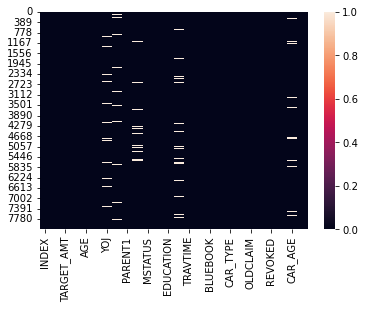

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(train_data.isnull())

In [7]:
#The data is examined for all columns containing null values.
#If one of the columns might only contain useless information, the whole column would be deleted
#Example of the values in a column shown here for 'YOJ'
train_data['YOJ'].value_counts()

12.0    1158
13.0    1016
11.0    1003
14.0     785
10.0     749
0.0      625
9.0      521
15.0     463
8.0      384
7.0      300
16.0     204
6.0      173
17.0     101
5.0       92
4.0       37
3.0       36
18.0      25
2.0       15
19.0      12
1.0        6
23.0       2
Name: YOJ, dtype: int64

In [8]:
train_data['INDEX'].value_counts()

1        1
6874     1
6890     1
6889     1
6888     1
        ..
3444     1
3441     1
3440     1
3439     1
10302    1
Name: INDEX, Length: 8161, dtype: int64

In [9]:
#The previous line shows, that every index value is unique while the following shows no correlation between INDEX and the target value
train_data[['INDEX','TARGET_FLAG']].corr()

,INDEX,TARGET_FLAG
INDEX,1.00000,-0.00167
TARGET_FLAG,-0.00167,1.00000


In [10]:
#Therefore the INDEX column can be later ignored
train_data.drop('INDEX',axis=1,inplace=True)

In [11]:
train_data.corr()

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
TARGET_FLAG,1.000000,0.534246,0.103668,-0.103217,0.115621,-0.070512,0.048368,-0.082370,0.216196,0.219197,-0.100651
TARGET_AMT,0.534246,1.000000,0.055394,-0.041728,0.061988,-0.022085,0.027987,-0.046481,0.116419,0.137866,-0.058822
KIDSDRIV,0.103668,0.055394,1.000000,-0.075179,0.464015,0.043305,0.008447,-0.001989,0.037063,0.053566,-0.053993
AGE,-0.103217,-0.041728,-0.075179,1.000000,-0.445441,0.136072,0.005269,-0.000066,-0.024092,-0.071575,0.176221
HOMEKIDS,0.115621,0.061988,0.464015,-0.445441,1.000000,0.086829,-0.007246,0.011813,0.029349,0.060601,-0.152146
YOJ,-0.070512,-0.022085,0.043305,0.136072,0.086829,1.000000,-0.016945,0.024787,-0.026308,-0.037855,0.061406
TRAVTIME,0.048368,0.027987,0.008447,0.005269,-0.007246,-0.016945,1.000000,-0.011605,0.006560,0.010599,-0.038233
TIF,-0.082370,-0.046481,-0.001989,-0.000066,0.011813,0.024787,-0.011605,1.000000,-0.023023,-0.041046,0.007767
CLM_FREQ,0.216196,0.116419,0.037063,-0.024092,0.029349,-0.026308,0.006560,-0.023023,1.000000,0.396638,-0.009319
MVR_PTS,0.219197,0.137866,0.053566,-0.071575,0.060601,-0.037855,0.010599,-0.041046,0.396638,1.000000,-0.019904


In [12]:
#Instead of trying to recreate the missing data, due to their low percentage of the total number of rows all null rows are deleted.
train_data.dropna(axis=0,inplace=True)

<AxesSubplot:xlabel='TARGET_FLAG', ylabel='count'>

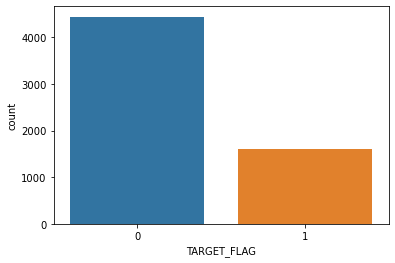

In [13]:
#The plot shows ne number of different outputs for the target. The significantly lower number of "ones" might affect the model's performance
sns.countplot(x='TARGET_FLAG',data=train_data)

In [14]:
#Extract the numeric value from all columns containing a price tag
train_data['INCOME'] = train_data['INCOME'].apply(lambda dollar: int(dollar.strip('$').replace(',','')))
train_data['HOME_VAL'] = train_data['HOME_VAL'].apply(lambda dollar: int(dollar.strip('$').replace(',','')))
train_data['BLUEBOOK'] = train_data['BLUEBOOK'].apply(lambda dollar: int(dollar.strip('$').replace(',','')))
train_data['OLDCLAIM'] = train_data['OLDCLAIM'].apply(lambda dollar: int(dollar.strip('$').replace(',','')))

In [15]:
#train_data['PARENT1'].value_counts()

In [15]:
#Binary text data gets transform to logical
train_data['PARENT1'] = train_data['PARENT1'].map({'No':0,'Yes':1})
train_data['MSTATUS'] = train_data['MSTATUS'].map({'z_No':0,'Yes':1})
train_data['SEX'] = train_data['SEX'].map({'M':0,'z_F':1})
train_data['CAR_USE'] = train_data['CAR_USE'].map({'Private':0,'Commercial':1})
train_data['RED_CAR'] = train_data['RED_CAR'].map({'no':0,'yes':1})
train_data['REVOKED'] = train_data['REVOKED'].map({'No':0,'Yes':1})
train_data['URBANICITY'] = train_data['URBANICITY'].map({'z_Highly Rural/ Rural':0,'Highly Urban/ Urban':1})

In [16]:
#Education shows two different entries that logically both refer to "High School"
train_data['EDUCATION'] = train_data['EDUCATION'].map({'z_High School':'HS','<High School':'HS','Bachelors':'B','Masters':'M','PhD':'PhD'})

In [17]:
#All columns with more than two possible text entries get transformed into dummy variables
edu_dummies = pd.get_dummies(train_data['EDUCATION'],drop_first=True)
train_data = pd.concat([train_data.drop('EDUCATION',axis=1),edu_dummies],axis=1)

job_dummies = pd.get_dummies(train_data['JOB'],drop_first=True)
train_data = pd.concat([train_data.drop('JOB',axis=1),job_dummies],axis=1)

car_dummies = pd.get_dummies(train_data['CAR_TYPE'],drop_first=True)
train_data = pd.concat([train_data.drop('CAR_TYPE',axis=1),car_dummies],axis=1)

<AxesSubplot:>

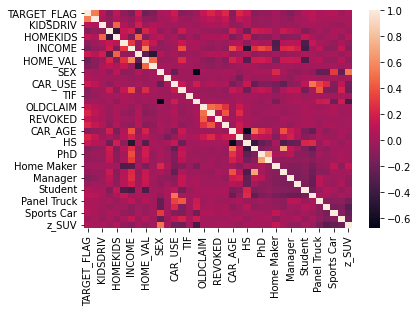

In [18]:
#Correlation heatmap
sns.heatmap(train_data.corr())

## Machine Learning part

In [19]:
#Before the actual target gets predicted, in this section the machine learning model is built and evaluated.
#Therefore the labeled data from the training group is splitted for later evaluation.
from sklearn.model_selection import train_test_split

In [20]:
#Since the target amount doesn't appear in the test data, it can't be fit into the model.
X = train_data.drop(['TARGET_FLAG','TARGET_AMT'],axis=1)
y = train_data['TARGET_FLAG']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#Since we are about to predict a category, a logistic regression model is chosen.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.metrics import classification_report,confusion_matrix

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
#The actual machine learning model
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
preds = model.predict(X_test)

In [27]:
#These standard metrics can evaluate the models performance.
print(classification_report(y_test,preds))
# Especially the confusion matrix shows a direct number of errors and will be observed in detail later on.
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1289
           1       0.67      0.40      0.50       525

    accuracy                           0.77      1814
   macro avg       0.73      0.66      0.68      1814
weighted avg       0.76      0.77      0.75      1814

[[1186  103]
 [ 314  211]]


## Target prediction
In this section the unlabeled data gets its predictions

In [28]:
#Test data has the same general structure
test_data.head(2)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban


In [29]:
#Prepare the test data in the same way as the training data

test_data.drop(['TARGET_FLAG','TARGET_AMT'],axis=1,inplace=True)
test_data.dropna(axis=0,inplace=True)
test_data.drop('INDEX',axis=1,inplace=True)

#Extract the numbers from all price tag columns
test_data['INCOME'] = test_data['INCOME'].apply(lambda dollar: int(dollar.strip('$').replace(',','')))
test_data['HOME_VAL'] = test_data['HOME_VAL'].apply(lambda dollar: int(dollar.strip('$').replace(',','')))
test_data['BLUEBOOK'] = test_data['BLUEBOOK'].apply(lambda dollar: int(dollar.strip('$').replace(',','')))
test_data['OLDCLAIM'] = test_data['OLDCLAIM'].apply(lambda dollar: int(dollar.strip('$').replace(',','')))


#Binary text data gets transform to logical entries
test_data['PARENT1'] = test_data['PARENT1'].map({'No':0,'Yes':1})
test_data['MSTATUS'] = test_data['MSTATUS'].map({'z_No':0,'Yes':1})
test_data['SEX'] = test_data['SEX'].map({'M':0,'z_F':1})
test_data['CAR_USE'] = test_data['CAR_USE'].map({'Private':0,'Commercial':1})
test_data['RED_CAR'] = test_data['RED_CAR'].map({'no':0,'yes':1})
test_data['REVOKED'] = test_data['REVOKED'].map({'No':0,'Yes':1})
test_data['URBANICITY'] = test_data['URBANICITY'].map({'z_Highly Rural/ Rural':0,'Highly Urban/ Urban':1})


#Education shows two different entries that logically both refer to "High School"
test_data['EDUCATION'] = test_data['EDUCATION'].map({'z_High School':'HS','<High School':'HS','Bachelors':'B','Masters':'M','PhD':'PhD'})


#All columns with more than two possible text entries get transformed into dummy variables
edu_dummies = pd.get_dummies(test_data['EDUCATION'],drop_first=True)
test_data = pd.concat([test_data.drop('EDUCATION',axis=1),edu_dummies],axis=1)

job_dummies = pd.get_dummies(test_data['JOB'],drop_first=True)
test_data = pd.concat([test_data.drop('JOB',axis=1),job_dummies],axis=1)

car_dummies = pd.get_dummies(test_data['CAR_TYPE'],drop_first=True)
test_data = pd.concat([test_data.drop('CAR_TYPE',axis=1),car_dummies],axis=1)

In [30]:
X_target = scaler.transform(test_data)

In [31]:
#The raw data is prepared for later export
data_export.drop(['TARGET_FLAG','TARGET_AMT'],axis=1,inplace=True)
data_export.dropna(axis=0,inplace=True)

In [32]:
#The predicted flags go into the export data
data_export['TARGET_FLAG'] = model.predict(X_target)

In [33]:
#The headers are saved in order to easily sort the columns
cols = data_export.columns
cols

Index(['INDEX', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY', 'TARGET_FLAG'],
      dtype='object')

In [34]:
data_export = data_export[['INDEX', 'TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY']]

In [35]:
data_export.to_csv('Target.csv',index=False)

## Alternative solutions
### KNeighbors

As shown in the section before, the performance is not quiet satisfactory yet. With a look to the scikitlearn cheat sheet, a KNeighbors Classifier might offer better results.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
#Since an appropriate number of neighbors is not easy to be found, the lowest errors is searched within a range of possible neighbors.
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

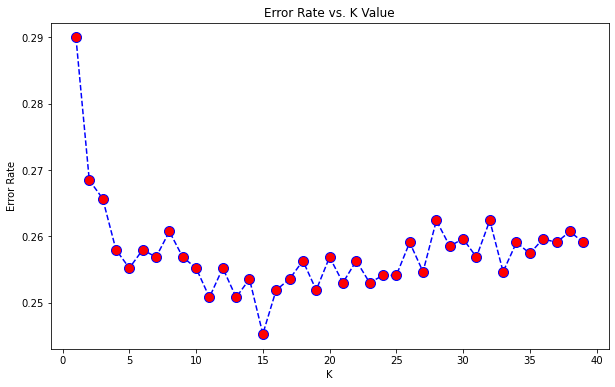

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
# With the lowest error at K = 15
knn = KNeighborsClassifier(n_neighbors=15)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [41]:
knnpreds = knn.predict(X_test)

In [42]:
print(classification_report(y_test,knnpreds))
print(confusion_matrix(y_test,knnpreds))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84      1289
           1       0.67      0.30      0.42       525

    accuracy                           0.75      1814
   macro avg       0.72      0.62      0.63      1814
weighted avg       0.74      0.75      0.72      1814

[[1209   80]
 [ 365  160]]


Still not too good.
Precision, recall and f1-score are better than before, but still indicate inaccurate results.

### Target Amount
As of shown before, the target amount has the highest correlation to the target flag. A linear regression on the amount might offer more insights on a possible target flag. By cutting off marginal target amounts, false positives could be reduced.

In [43]:
#Target Amount and Target Flag are linked
train_data[train_data['TARGET_AMT']==0]['TARGET_FLAG'].value_counts()

0    4443
Name: TARGET_FLAG, dtype: int64

### Fit a linear regression model

In [44]:
Xlin = train_data.drop(['TARGET_FLAG','TARGET_AMT'],axis=1)
ylin = train_data['TARGET_AMT']

In [45]:
Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(Xlin, ylin, test_size=0.3, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()

In [47]:
linmodel.fit(Xlin_train,ylin_train)

LinearRegression()

In [48]:
predictions = linmodel.predict(Xlin_test)

In [49]:
#Some statements about the error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ylin_test, predictions))
print('MSE:', metrics.mean_squared_error(ylin_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ylin_test, predictions)))

MAE: 1965.1848540346434
MSE: 20658314.514390778
RMSE: 4545.141858555217


In [50]:
#all amounts below a certain threshold can be seen as false positive.
threshold = np.arange(0,10000,100)
FP = np.zeros(len(threshold))
FN = np.zeros(len(threshold))
cc = 0
for TT in threshold:
    FLAG = np.zeros(len(ylin_test))
    for i in range(0,len(ylin_test)):
        if predictions[i] > TT:
            FLAG[i] = 1
        else:
            continue
    FP[cc] = (confusion_matrix(y_test,FLAG).sum(axis=0) - np.diag(confusion_matrix(y_test,FLAG)))[0]
    FN[cc] = (confusion_matrix(y_test,FLAG).sum(axis=1) - np.diag(confusion_matrix(y_test,FLAG)))[0]
    cc = cc+1


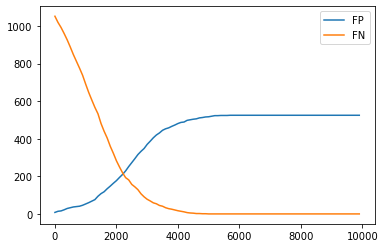

In [51]:
#The plot shows the false positives and false negatives for different thresholds
#in this example, the main goal is to reduce both
plt.figure
plt.plot(threshold,FP,label="False Positive")
plt.plot(threshold,FN,label="False Negative")
plt.legend()

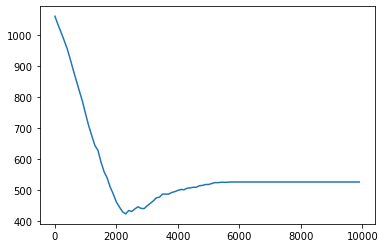

In [52]:
plt.plot(threshold,(FN+FP))

The sum of all errors appears to be lowest at a threshold of around TT = 2000.

### New predictions for the test data

The linear regression model is is used to predict the target amount on the test data. The threshold from before is then used to predict the target classes.

In [53]:
test_predictions = linmodel.predict(test_data)

In [54]:
FLAG = np.zeros(len(test_data))
for i in range(0,len(test_data)):
    if test_predictions[i] > 2000:
        FLAG[i] = 1
    else:
        continue

In [55]:
data_export['TARGET_FLAG'] = FLAG

In [56]:
data_export = data_export[['INDEX', 'TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY']]

In [57]:
data_export['TARGET_FLAG'].value_counts()

0.0    1034
1.0     578
Name: TARGET_FLAG, dtype: int64